In [1]:
# importing the libraries we'll use in all parts of the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import warnings
from sklearn import datasets
sns.set_palette("pastel")
import datetime
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
# get given data, turn it into a DataFrame so we can have access to the desired information
df_original = pd.read_csv("Expanded_data_with_more_features.csv")

- The only features with **no** missing values are : Gender, Unnamed, Lunchtype, MathScore, ReadingScore, WritingScore

In [3]:
df_students = pd.read_csv("Expanded_data_with_more_features.csv")

In [4]:
df_students['average'] = ((df_students['MathScore'] + df_students['ReadingScore'] + df_students['WritingScore'])/3)
df_students = df_students.drop('EthnicGroup', axis=1)

# Mini Project - Into to Data Analysis

# Part 1 - choosing a dataset to work with

- <b>Question 1 </b> - Which dataset did we choose?

We chose the dataset "Students Exam Score"

- <b> Question 2 </b> - What is this dataset about?

This dataset is about students in school, their grades in certain subjects in school and other information that may come to affect their outcome in school - Information about their life in general

- <b>Question 3 </b> - List the features in the dataset and their types

In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


- <b>Question 4</b> - List the number of records in the dataset

In [6]:
records = df_original.shape[0]
print(f'There are {records-1} records in the dataset.')

There are 30640 records in the dataset.


# Part 2 - exploratory data analysis

- <b>Question 1 </b> - Show plots illutrating the distribution of at least 5 variables in your dataset. Comment on anything interesting you observe

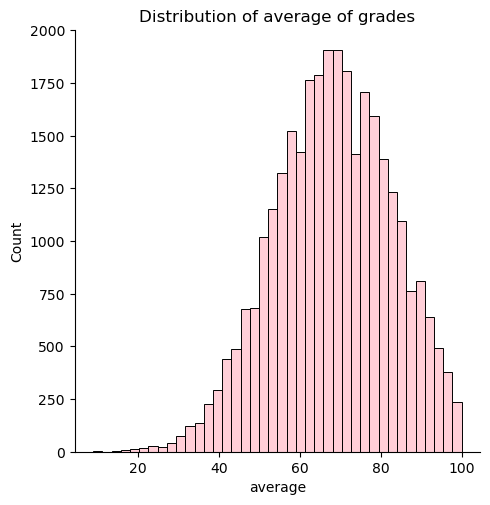

In [7]:
ax = sns.displot(df_students['average'], bins = 40, color = "pink").set(title='Distribution of average of grades')

2.0


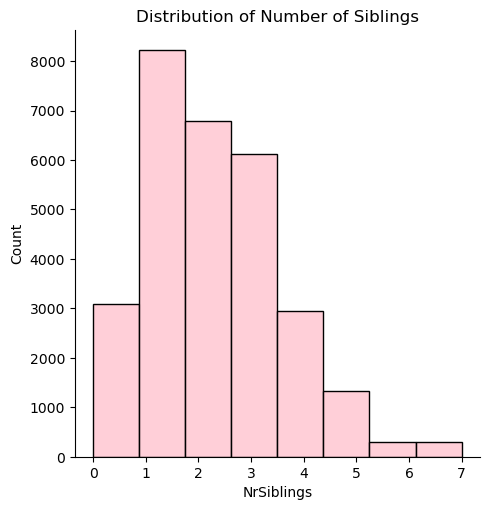

In [8]:
print(df_students['NrSiblings'].median())
ax = sns.displot(df_students['NrSiblings'], bins = 8, color = "pink").set(title='Distribution of Number of Siblings')

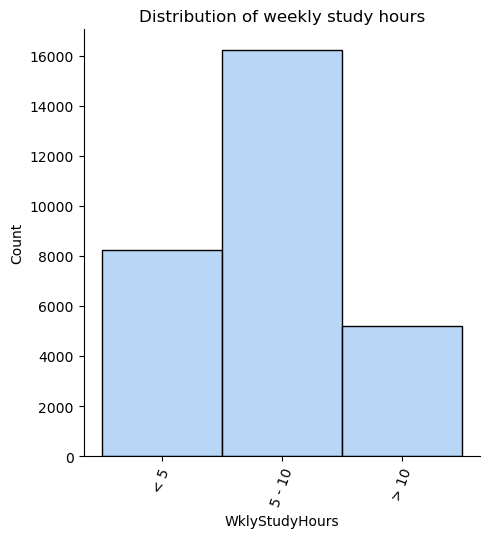

In [9]:
facetgrid_obj = sns.displot(data=df_original['WklyStudyHours'], bins=10).set(title="Distribution of weekly study hours")
facetgrid_obj.set_xticklabels(rotation=70) # Rotate the x label ticks text by 70 degrees

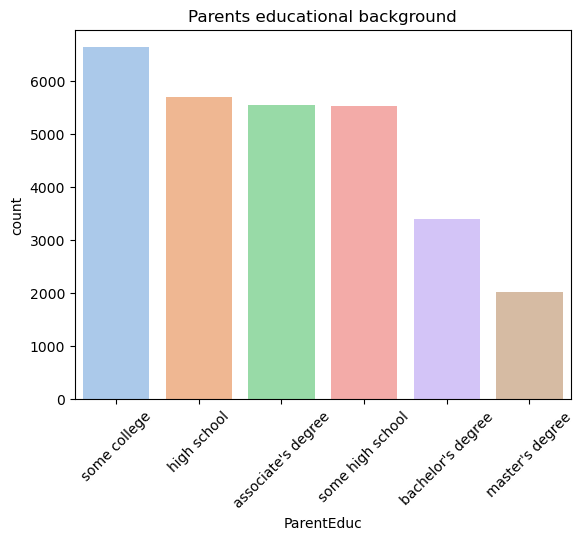

In [10]:
sns.countplot(x=df_original['ParentEduc'], order=['some college', 'high school', "associate's degree", 'some high school', "bachelor's degree", "master's degree"])
plt.title('Parents educational background')
plt.xticks(rotation=45);

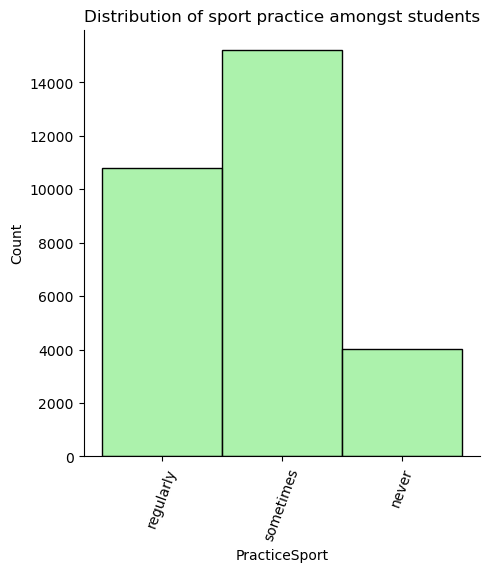

In [11]:
facetgrid_obj = sns.displot(data=df_original['PracticeSport'], bins=10, color='lightgreen').set(title="Distribution of sport practice amongst students")
facetgrid_obj.set_xticklabels(rotation=70) # Rotate the x label ticks text by 70 degrees

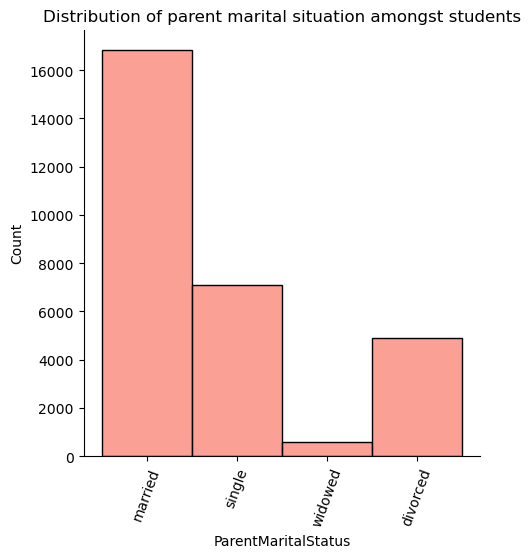

In [12]:
facetgrid_obj = sns.displot(data=df_original['ParentMaritalStatus'], bins=10, color='salmon').set(title="Distribution of parent marital situation amongst students")
facetgrid_obj.set_xticklabels(rotation=70) # Rotate the x label ticks text by 70 degrees

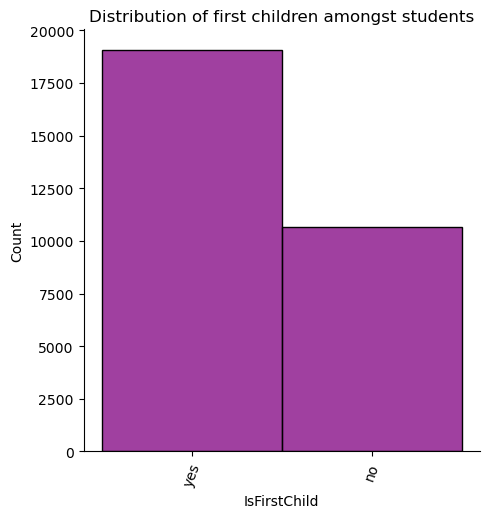

In [13]:
facetgrid_obj = sns.displot(data=df_original['IsFirstChild'], bins=10, color='purple').set(title="Distribution of first children amongst students")
facetgrid_obj.set_xticklabels(rotation=70) # Rotate the x label ticks text by 70 degrees

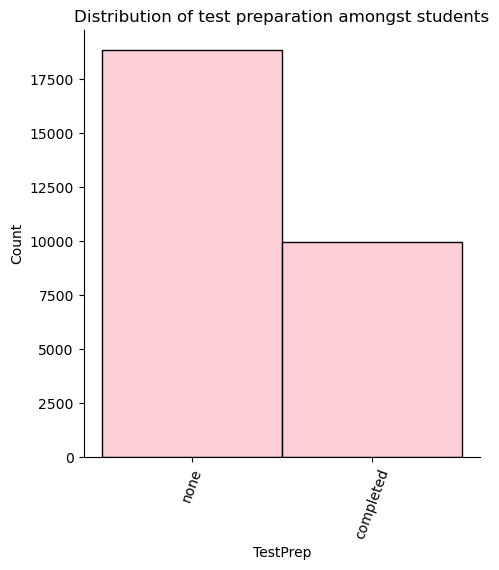

In [14]:
facetgrid_obj = sns.displot(data=df_original['TestPrep'], bins=10, color='pink').set(title="Distribution of test preparation amongst students")
facetgrid_obj.set_xticklabels(rotation=70) # Rotate the x label ticks text by 70 degrees

- <b>Question 2</b> - Show plots illustrating bivariate relationship for at least 2 pais of variables. Explain what you observe (e.g., positive/negative correlation, no correlation, etc)

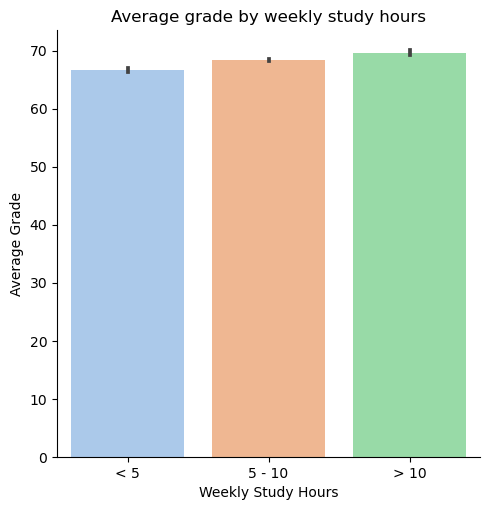

In [15]:
ax = sns.catplot(kind='bar', x='WklyStudyHours', y='average', data=df_students)
ax.set(xlabel='Weekly Study Hours', ylabel='Average Grade', title='Average grade by weekly study hours');

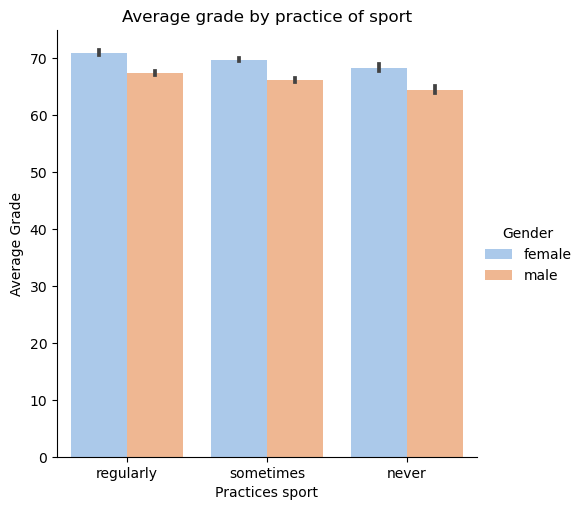

In [16]:
ax = sns.catplot(kind='bar', x='PracticeSport', y='average', hue='Gender', data=df_students)
ax.set(xlabel='Practices sport', ylabel='Average Grade', title='Average grade by practice of sport');

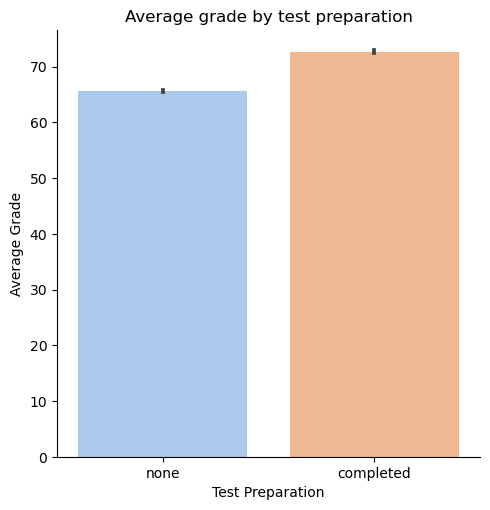

In [17]:
ax = sns.catplot(kind='bar', x='TestPrep', y='average', data=df_students)
ax.set(xlabel='Test Preparation', ylabel='Average Grade', title='Average grade by test preparation');

# Part 3- Estimation and hypothesis testing
    Here we'll formally test a hypothesis using our data

- <b>Question 1</b> - What is the question you want to explore? Why is it interesting to you?

   The question we want to explore is whether the the average grade of a student is diferent when he practices sport regularly, in contrast to when he doesn't. <br> This particular question is interesting to us given we both practice sport regularly and are connected to the subject. <br>Other than that in the Data Exploration we observed that there is a connection between average grades and the regularly practice of sport, and would like to know whether there is causation between the two variables.

- <b> Question 2 </b>- Clearly state your Null Hypothesis and Alternative Hypothesis

$H_{0}$: There is no difference between the average grade of sudents who practice sports regularly or not
    
$H_{1}$: The average grade of students who practice sports regularly is different than the average grade of students who don't

- <b> Question 3</b> - Run a test and report the results in a comprehensive way

The statistic function will calculate the difference between the averages of students who practice sports regularly to students who dont

In [18]:
null_parameter_diff_avg = 0

In [19]:
df_sport = df_students[['average', 'PracticeSport']]
df_sport.dropna()

,average,PracticeSport
0,72.000000,regularly
1,82.333333,sometimes
2,90.333333,sometimes
3,47.666667,never
4,76.333333,sometimes
...,...,...
30636,61.666667,sometimes
30637,54.000000,regularly
30638,66.000000,sometimes
30639,88.333333,regularly


In [20]:
# the function which will calculate our statistic from each of the samples
def diff_avg(yes_sport, no_sport):
    avg_yes = yes_sport.mean()
    avg_no = no_sport.mean()
    return avg_yes - avg_no

In [21]:

def bootstrap_sport(original_sport, num_reps):
    original_yes = original_sport.loc[original_sport['PracticeSport'] == 'regularly', 'average']
    original_no = original_sport.loc[original_sport['PracticeSport'] != 'regularly', 'average']
    yes_size = original_yes.shape[0]
    no_size = original_no.shape[0]
    
    bstrap_diff = np.empty(num_reps)
    
    for i in range(num_reps):
        new_yes = np.random.choice(original_yes, size=yes_size, replace=True)
        new_no = np.random.choice(original_no, size=no_size, replace=True)
        diff = diff_avg(new_yes, new_no)
        bstrap_diff[i] = diff
    
    return bstrap_diff

In [22]:
reps = 5000
differences_bootstrapped = bootstrap_sport(df_sport, reps)

In [23]:
# 95% confidence interval for the expenditures based on our sample
left_end_95 = np.percentile(differences_bootstrapped, 2.5, method='higher')
right_end_95 =  np.percentile(differences_bootstrapped, 97.5, method='higher')
print('lower value: ', left_end_95)
print('upper value: ', right_end_95)

lower value:  1.2291336561275301
upper value:  1.896443238229736


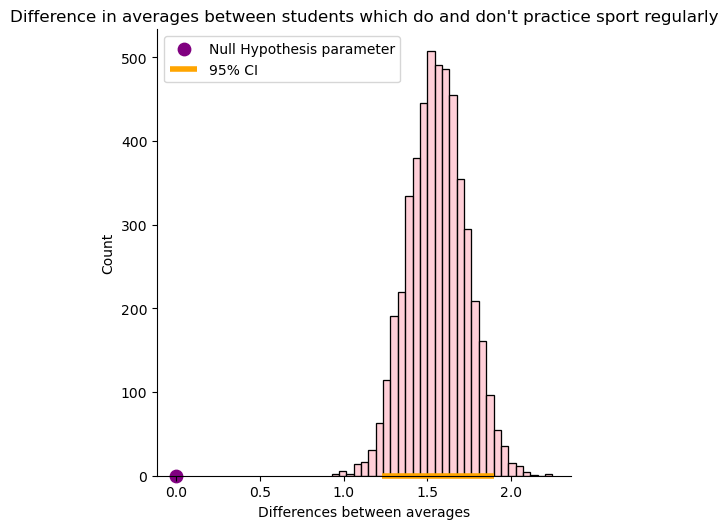

In [24]:
ax = sns.displot(differences_bootstrapped, bins = 30, color = "pink")
ax.set(xlabel='Differences between averages', title='Difference in averages between students which do and don\'t practice sport regularly')
plt.scatter(null_parameter_diff_avg, 0, color='purple', s=80, clip_on=False)
plt.hlines(y=0, xmin=left_end_95, xmax=right_end_95, colors='orange', linestyles='solid', lw=4, clip_on=False)  # show line of values between 2.5 and 97.5 percentiles
plt.legend(['Null Hypothesis parameter', '95% CI'])

After conducting a hypothesis testing using the Bootstrap Method, we got as a result that our Confidence Interval (with a confidence level of 95%) is between 1.2 and 1.9, our Null Hypothesis stated that there as no difference between averages of students who practice sport regularly to those who don't, so the parameter that it defines would be 0 (given that our statistic mesures said difference between averages. </br>
</br>
As we can see in the distribution shown above, the value '0' is not included inside the Confidence Level we got and so we will **reject** the Null Hypothesis, with a Confidence Level of 95%

# Part 4 - Prediction / Classification

 - <b>Question 1</b> - What do you want to try to classify? Why? What is a potential application of an algorithm that
classifies your target variable?

We will try to predict whether a student will reach exellency in their studies or not, according to other aspects of the student's life. That is to be able to say what aspects of ones life can affect (positively or negatively) their grades, and if they are things in their control, we can suggest thei doing (or suggest the stopping of a certain habit).

- <b>Question 2</b> - Clearly state what is the target variable (class) you are trying to predict, which variables
(features) you are using to predict the class, and why you chose these variables..


In [25]:
df_excell = df_students.copy()

In [26]:
# add a column that will say whether or not the students is excellent
df_excell['Excellent'] = (df_excell['average'] >= 80)
df_excell = pd.get_dummies(df_excell, columns=['Excellent'], drop_first=True)

# remove the now not relevant columns that are connected to the students grades
df_excell.drop('MathScore',axis='columns', inplace=True)
df_excell.drop('ReadingScore',axis='columns', inplace=True)
df_excell.drop('WritingScore',axis='columns', inplace=True)
df_excell.drop('average',axis='columns', inplace=True)

df_excell.drop('Unnamed: 0',axis='columns', inplace=True)

# most of the students did not go through a test preparation so we will fill the missin values with the most common
df_excell['TestPrep'].fillna('none', inplace=True)

# fill the Number of Siblings missing values with the median
df_excell['NrSiblings'].fillna(df_excell['NrSiblings'].median(), inplace=True)

# fill the Weekly Study Hours missing values with the most common
df_excell['WklyStudyHours'].fillna('5 - 10', inplace=True)

# remove the feature Transport Means due to the fact that there are too many missing values
df_excell.drop(['TransportMeans'], axis=1, inplace=True)

# filling with the average "value" of educational levels
df_excell['ParentEduc'].fillna('some college', inplace=True)

# fill Parents Marital Status missing values with the most common, 'married', according to our data analysis
df_excell['ParentMaritalStatus'].fillna('married', inplace=True)

# fill missing values with one that is most common and will be more accurate for multiple cases
df_excell['IsFirstChild'].fillna('yes', inplace=True)

# drop the lines with missing values, due to them being a small percentage of the whole data frame
df_excell.dropna(subset='PracticeSport', inplace=True)

In [27]:
df_excell

,Gender,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,Excellent_True
0,female,bachelor's degree,standard,none,married,regularly,yes,3.0,< 5,0
1,female,some college,standard,none,married,sometimes,yes,0.0,5 - 10,1
2,female,master's degree,standard,none,single,sometimes,yes,4.0,< 5,1
3,male,associate's degree,free/reduced,none,married,never,no,1.0,5 - 10,0
4,male,some college,standard,none,married,sometimes,yes,0.0,5 - 10,0
...,...,...,...,...,...,...,...,...,...,...
30636,female,high school,standard,none,single,sometimes,no,2.0,5 - 10,0
30637,male,high school,standard,none,single,regularly,no,1.0,5 - 10,0
30638,female,high school,free/reduced,completed,married,sometimes,no,1.0,5 - 10,0
30639,female,associate's degree,standard,completed,married,regularly,no,3.0,5 - 10,1


In [28]:
# here we will encode our data to numeric numbers
df_excell = pd.get_dummies(df_excell, columns=['LunchType'], drop_first=True)
df_excell.replace({'WklyStudyHours':{'< 5':0, '5 - 10':1, '> 10':2}}, inplace=True)
df_excell.replace({'TestPrep':{'none':0, 'completed':1}}, inplace=True)
df_excell.replace({'PracticeSport':{'never':0, 'sometimes':1, 'regularly':2}}, inplace=True)
df_excell.replace({'TransportMeans':{'school_bus':0, 'private':1}}, inplace=True)
df_excell = pd.get_dummies(df_excell, columns=['Gender'], drop_first=True)
df_excell.replace({'ParentEduc':{'some high school':0, 'high school':1, 'associate\'s degree':2, 'some college':3, 'bachelor\'s degree':4, 'master\'s degree':5}}, inplace=True)
df_excell = pd.get_dummies(df_excell, columns=['IsFirstChild'], drop_first=True)
df_excell = pd.get_dummies(df_excell, columns=['ParentMaritalStatus'], drop_first=True)
df_excell

,ParentEduc,TestPrep,PracticeSport,NrSiblings,WklyStudyHours,Excellent_True,LunchType_standard,Gender_male,IsFirstChild_yes,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed
0,4,0,2,3.0,0,0,1,0,1,1,0,0
1,3,0,1,0.0,1,1,1,0,1,1,0,0
2,5,0,1,4.0,0,1,1,0,1,0,1,0
3,2,0,0,1.0,1,0,0,1,0,1,0,0
4,3,0,1,0.0,1,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30636,1,0,1,2.0,1,0,1,0,0,0,1,0
30637,1,0,2,1.0,1,0,1,1,0,0,1,0
30638,1,1,1,1.0,1,0,0,0,0,1,0,0
30639,2,1,2,3.0,1,1,1,0,0,1,0,0


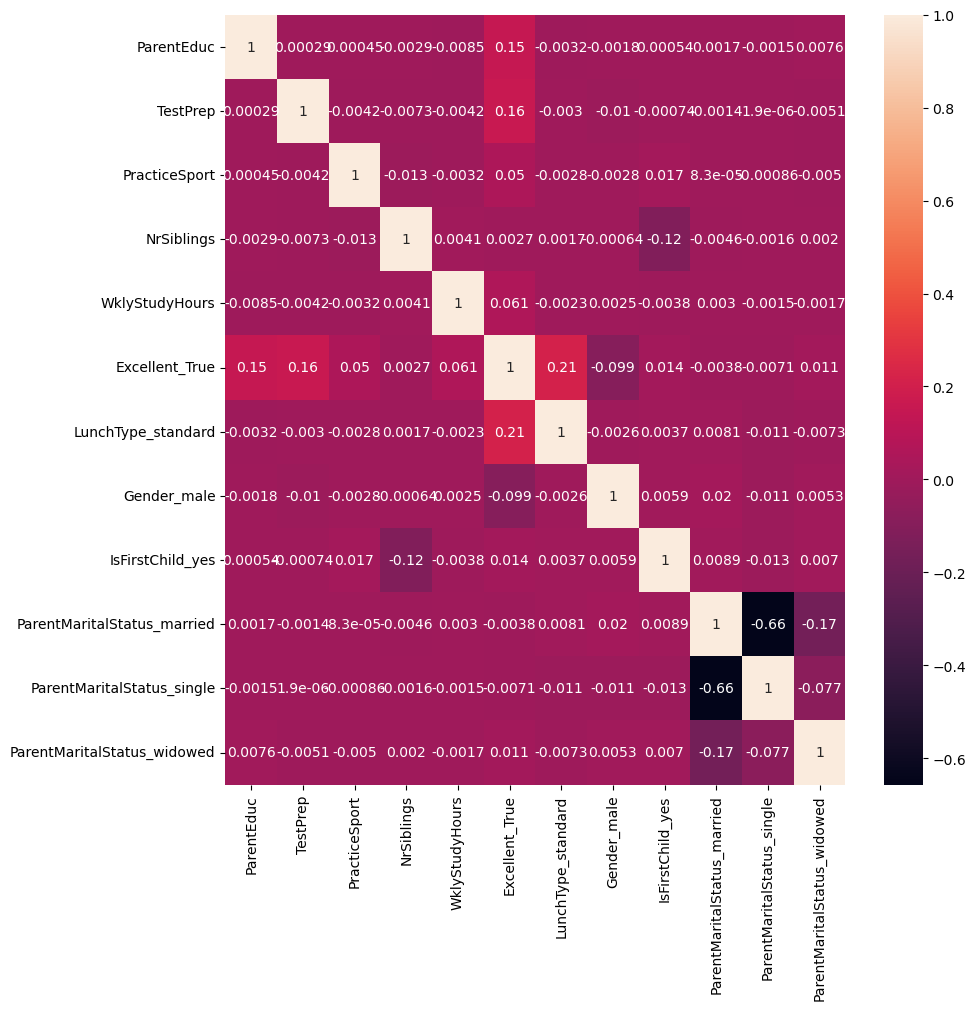

In [35]:
df_excell = df_excell.sample(frac=1) # shuffling all the data frame
X = df_excell.drop('Excellent_True', axis=1) # Features 
Y = df_excell['Excellent_True'] # Target 

# splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

correlations = df_excell.corr()
plt.figure(figsize=(10,10))
g=sns.heatmap(correlations,annot=True)

In [36]:
correlations.reindex(correlations["Excellent_True"].abs().sort_values().index)["Excellent_True"] # ordered by absolute value

NrSiblings                     0.002688
ParentMaritalStatus_married   -0.003824
ParentMaritalStatus_single    -0.007071
ParentMaritalStatus_widowed    0.010742
IsFirstChild_yes               0.013603
PracticeSport                  0.049605
WklyStudyHours                 0.060909
Gender_male                   -0.099056
ParentEduc                     0.151306
TestPrep                       0.164890
LunchType_standard             0.210932
Excellent_True                 1.000000
Name: Excellent_True, dtype: float64

The target class is "Excellent" and we will use the features : 'LunchType_standard', 'TestPrep', 'ParentEduc', 'Gender_male' to predict our target class, given that these were the highest correlations we got

In [38]:
# getting our train and test only with the relevant features
selected_features = ['LunchType_standard', 'TestPrep', 'ParentEduc', 'Gender_male']
X_train = X_train.loc[ : , selected_features]
X_test = X_test.loc[ : , selected_features]

In [39]:
#scaling the data of our features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Highest accuracy is obtained for k = 24 and equals 0.7752421213383311


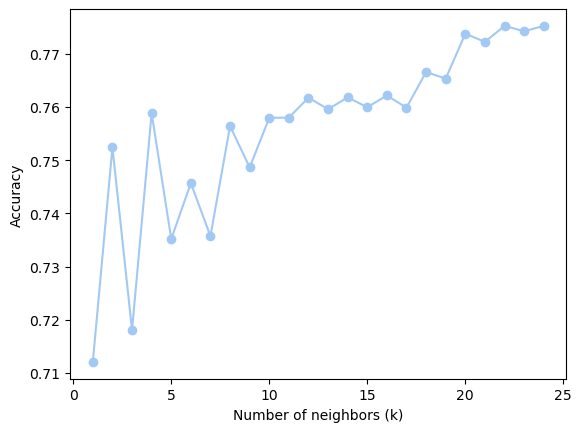

In [40]:
mean_cv_scores = []
k_list = range(1, 25)
for nn in k_list:
    knn_cv = KNeighborsClassifier(n_neighbors=nn)
    cv_scores = cross_val_score(knn_cv, X_train, Y_train, cv=10)
    mean_cv_scores.append(cv_scores.mean())
    
# output results
best_k = mean_cv_scores.index(max(mean_cv_scores))+1 # gets index of best performing k and adds 1
print('Highest accuracy is obtained for k =', best_k, 'and equals', max(mean_cv_scores))
plt.plot(k_list, mean_cv_scores, '-o')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy');

In [41]:
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)  
knn_classifier.fit(X_train, Y_train)
print('accuracy of the classifier is', knn_classifier.score(X_test, Y_test))

# Compute a confusion matrix
predictions = knn_classifier.predict(X=X_test) # get the classifier's predictions 
print('confusion matrix: \n', confusion_matrix(y_true=Y_test, y_pred=predictions, labels=[0, 1])) # rows are true values, columns are predicted values

print('precision: ', precision_score(y_true=Y_test, y_pred=predictions, labels=[0, 1]))
print('recall: ', recall_score(y_true=Y_test, y_pred=predictions, labels=[0, 1]))

accuracy of the classifier is 0.7759080306564479
confusion matrix: 
 [[4502  116]
 [1229  155]]
precision:  0.5719557195571956
recall:  0.1119942196531792


Our classifier has an accuracy percentage of 77%

<font color=lightblue>Raíssa Chut Steinberg and Hadar Gottesfeld